In [83]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [127]:
df_tp_combine = pd.read_pickle('df_tp_combine.pkl')

In [128]:
df_tp_combine.head()

,tweet,topic_number,topic,description,descpt_topic_number,descpt_topic,senti_score,author_followers,author_followings,author_tweets,retweets,replies,likes,quote_count
0,dr malone the government is now lawless,14,just_don_know,connecting through the clouds,6,pro_anti_something,0.0000,12.0,88.0,5820.0,0.0,0.0,0.0,0.0
1,“how prevents melatonin significantly reduces ...,8,think_twice_vaccinate_kids,meeting like minded citizens who'll fight for ...,8,free_speech_thinker,0.0772,2106.0,2790.0,28117.0,0.0,0.0,0.0,0.0
2,i would really love to see you debate dr malo...,14,just_don_know,"if you're a liberal, lol = you're a fucking id...",11,what_people_like_and_about_time,0.9381,104.0,703.0,8636.0,0.0,0.0,0.0,0.0
3,hmmm have you listened to the interviews ith ...,4,mccullough_malone,"screenwriter, producer, marketing manager, singer",11,what_people_like_and_about_time,0.0000,3297.0,4999.0,131767.0,0.0,0.0,0.0,0.0
4,yes dr malone is solid brilliant deeply infor...,14,just_don_know,"retired academic, esl/applied linguistics; uta...",0,conservative_christian_trump,0.8739,33.0,164.0,100.0,0.0,0.0,0.0,0.0


In [129]:
descrip_topics_list = ['conservative_christian_trump',
                        'just_guy_someone',
                         'truthseeker',
                         'god_family_country',
                         'gettr_gab_parler_other_platform',
                         'jersey_girlinfj_no_dms_no magats',
                         'pro_anti_something',
                        'father_husband_identity',
                        'free_speech_thinker',
                         'love_something',
                         'do/dont_follow_don/do_somthing',
                         'what_people_like_and_about_time',
                         ]
len(descrip_topics_list)

12

In [130]:
tweet_topics_list= ['joe_malone_interview',
 'mass_formation_psychosis',
 'inventor_of_mrna_malone',
 'china_spread_hemorrhagic_fever_virus',
 'mccullough_malone',
 'someone_liked_malone',
 'veritas_project_premeditated_manslaughter',
 'malone_interview',
 'think_twice_vaccinate_kids',
 'listen_to_malone_podcast',
 'about_what_malone_said',
 'malone_invented_mrna',
 'vaccine_mrna',
 'twitter_banned_malone',
 'just_don_know']

len(tweet_topics_list)

15

In [131]:
df_analy = (df_tp_combine.groupby(['topic_number','descpt_topic_number']).
                agg({'senti_score':['mean','std'], 'tweet':'count'}).reset_index())
df_analy.columns = ['topic_number','descpt_topic_number','senti_score_mean','senti_score_std','tweet_count']
df_analy

,topic_number,descpt_topic_number,senti_score_mean,senti_score_std,tweet_count
0,0,0,-0.040642,0.494203,62
1,0,1,0.224995,0.433715,20
2,0,2,-0.079539,0.383674,18
3,0,3,0.029368,0.491252,31
4,0,4,0.085683,0.414088,18
...,...,...,...,...,...
175,14,7,0.059442,0.489254,191
176,14,8,0.008552,0.470807,197
177,14,9,-0.003053,0.458857,213
178,14,10,-0.011804,0.452758,246


In [132]:
df_analy.describe()

,topic_number,descpt_topic_number,senti_score_mean,senti_score_std,tweet_count
count,180.000000,180.000000,180.000000,179.000000,180.000000
mean,7.000000,5.500000,0.017774,0.461084,65.127778
std,4.332545,3.461682,0.110139,0.053270,129.656876
min,0.000000,0.000000,-0.743000,0.237144,1.000000
25%,3.000000,2.750000,-0.026561,0.433737,20.750000
50%,7.000000,5.500000,0.022612,0.468967,32.000000
75%,11.000000,8.250000,0.068649,0.488533,52.500000
max,14.000000,11.000000,0.320711,0.610842,1492.000000


In [133]:
df_temp = df_tp_combine.groupby(['topic_number'])['senti_score'].mean().reset_index()
df_temp

,topic_number,senti_score
0,0,0.029069
1,1,0.024996
2,2,0.038348
3,3,-0.009650
4,4,0.034313
5,5,0.043483
6,6,0.058376
7,7,0.047448
8,8,-0.013593
9,9,0.032789


<AxesSubplot:xlabel='topic_number'>

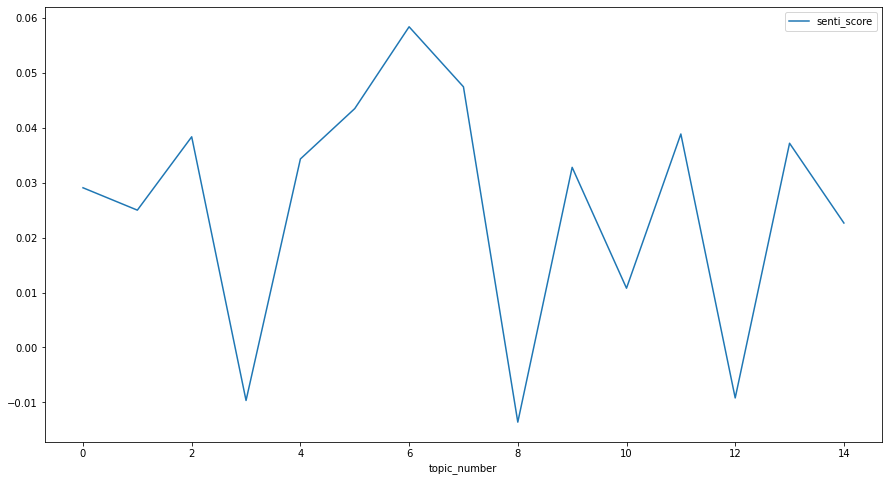

In [134]:
df_temp.plot(x = 'topic_number',y='senti_score',figsize=(15,8))

<AxesSubplot:xlabel='topic_number', ylabel='senti_score'>

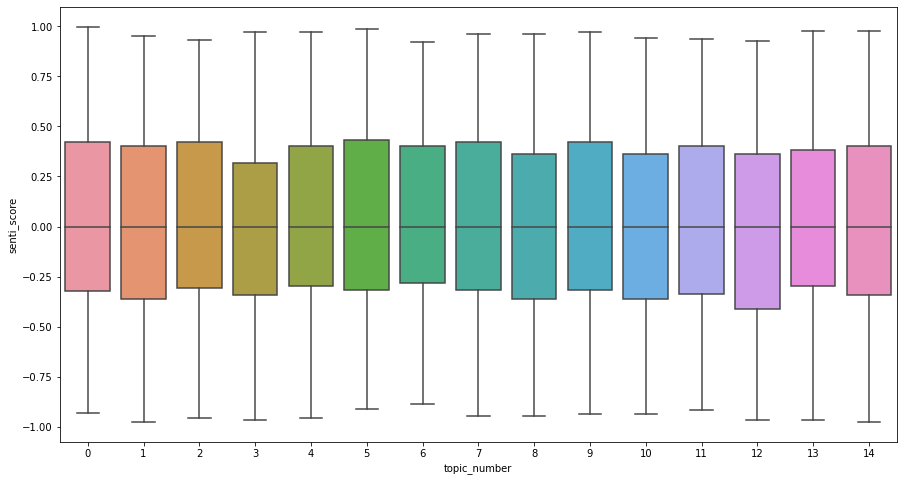

In [135]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df_tp_combine, x = 'topic_number', y = 'senti_score')

<AxesSubplot:xlabel='descpt_topic_number', ylabel='senti_score'>

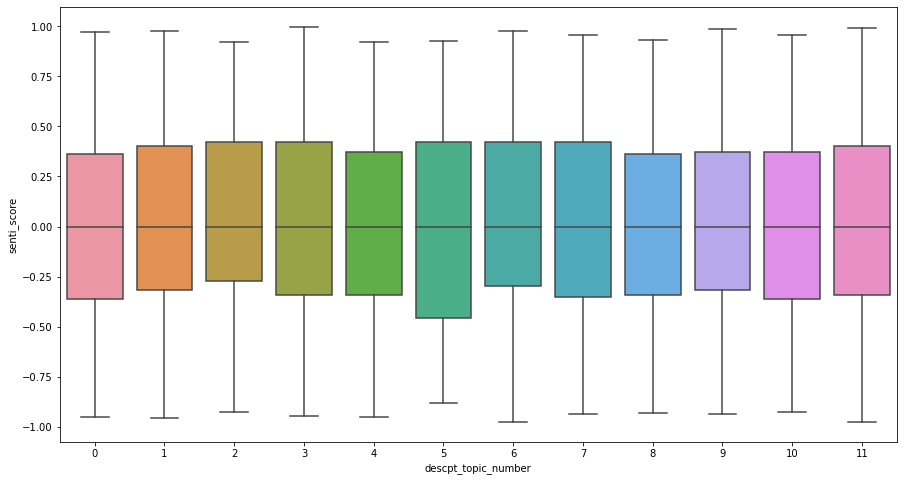

In [162]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df_tp_combine, x = 'descpt_topic_number', y = 'senti_score')

/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.85, 'Different people have diffent attitude on topics fig_1')

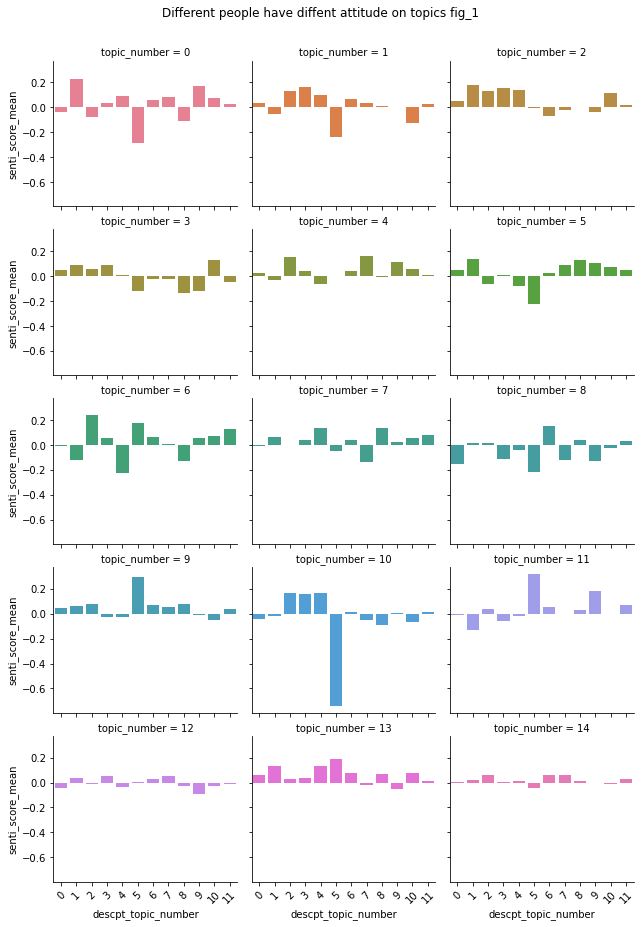

In [139]:
grid = sns.FacetGrid(df_analy,col="topic_number", col_wrap=3,hue = 'topic_number')
grid.map(sns.barplot,'descpt_topic_number','senti_score_mean')
grid.set_xticklabels(rotation = 45)
grid.fig.subplots_adjust(top= 0.8)
grid.fig.suptitle('Different people have diffent attitude on topics fig_1',x = .5, y = .85)

/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.05, 'Different people have diffent attitude on topics fig_2')

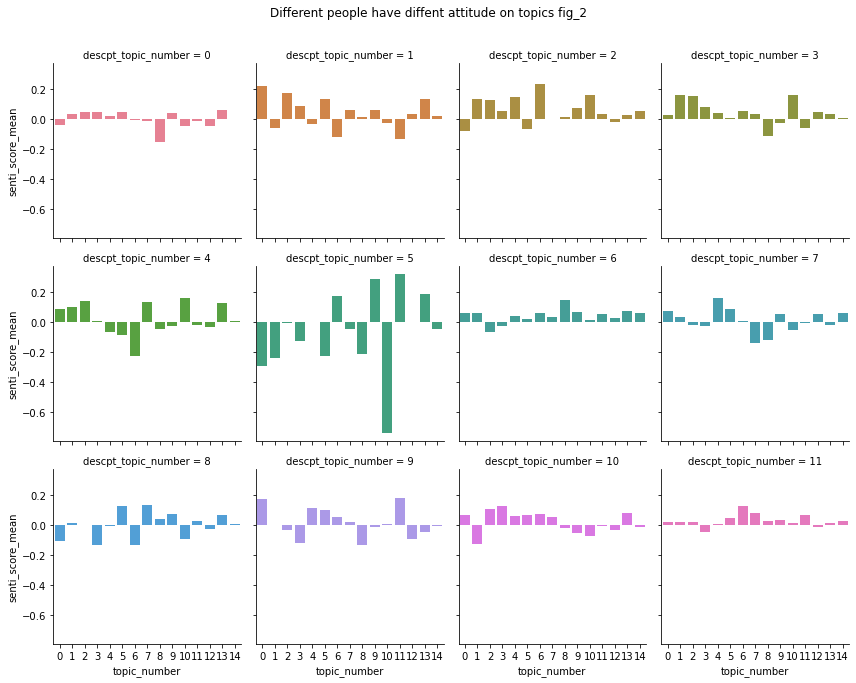

In [140]:
grid = sns.FacetGrid(df_analy,col="descpt_topic_number", col_wrap=4,hue = 'descpt_topic_number')
grid.map(sns.barplot,'topic_number','senti_score_mean')
grid.fig.suptitle('Different people have diffent attitude on topics fig_2',x = .5, y = 1.05)

In [148]:
def topic_user_search(topic_n = 0,descpt_topic_n =1):
    df_temp_group_topic = (df_tp_combine[( df_tp_combine.topic_number == topic_n)
                                        &(df_tp_combine.descpt_topic_number == descpt_topic_n)])
    senti_mean = np.mean(df_temp_group_topic.senti_score)
    print(f'Topic: {tweet_topics_list[topic_n]}, user group: {descrip_topics_list[descpt_topic_n]}')
    print('Sentiment score mean is : ',senti_mean)
    x = random.sample(df_temp_group_topic.tweet.to_list(),min(5,len(df_temp_group_topic)))
    for i,j in enumerate (x):
        print(i,":",j)

In [171]:
topic_user_search(10,3)

Topic: about_what_malone_said, user group: god_family_country
Sentiment score mean is :  0.16065000000000002
0 :  more and more of those who received boosters are getting the variant probably like what dr malone said you don’t use yesterdays weapons to fight todays wars paraphrasing 
1 :  dr malone said 6 weeks this whole thing has been a lie 
2 :  malone also said you cant get it twice your natural immune response recognises the strain sequence and derivatives of it i emphasis natural maybe those that are getting synthetic mrna induced variety are getting different strains because is not natural virus 
3 : i know most who have anything to say about the podcast with dr malone have said it all but please listen to the last 20 mins of the 3 hours if you want continued freedom 
4 :  liberal rag what was wrong with what dr malone said he is spot on cnbc is a front for the people wanting to control us 


In [169]:
topic_user_search(10,5)

Topic: about_what_malone_said, user group: jersey_girlinfj_no_dms_no magats
Sentiment score mean is :  -0.743
0 :  well it matches what dr malone said to rogan where they re just hoping endless boosters does something


In [159]:
l1= range(len(tweet_topics_list))
dict(zip(l1,tweet_topics_list))

{0: 'joe_malone_interview',
 1: 'mass_formation_psychosis',
 2: 'inventor_of_mrna_malone',
 3: 'china_spread_hemorrhagic_fever_virus',
 4: 'mccullough_malone',
 5: 'someone_liked_malone',
 6: 'veritas_project_premeditated_manslaughter',
 7: 'malone_interview',
 8: 'think_twice_vaccinate_kids',
 9: 'listen_to_malone_podcast',
 10: 'about_what_malone_said',
 11: 'malone_invented_mrna',
 12: 'vaccine_mrna',
 13: 'twitter_banned_malone',
 14: 'just_don_know'}

In [160]:
l2= range(len(descrip_topics_list))
dict(zip(l2,descrip_topics_list))

{0: 'conservative_christian_trump',
 1: 'just_guy_someone',
 2: 'truthseeker',
 3: 'god_family_country',
 4: 'gettr_gab_parler_other_platform',
 5: 'jersey_girlinfj_no_dms_no magats',
 6: 'pro_anti_something',
 7: 'father_husband_identity',
 8: 'free_speech_thinker',
 9: 'love_something',
 10: 'do/dont_follow_don/do_somthing',
 11: 'what_people_like_and_about_time'}